# Sentiment Analysis on Movie Reviews

## Importing require libraries

In [2]:
import pandas as pd
import numpy as np
import nltk
import textblob 
from sklearn.metrics import confusion_matrix, classification_report
np.set_printoptions(precision=2, linewidth=80)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # notice the spelling with the f before Vectorizer
from sklearn.naive_bayes import MultinomialNB # notice the Caps on the M
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
 

## Importing dataset and display first 10 rows

In [3]:
df = pd.read_excel('Mountain Analytics IMDB Dataset 1.xlsx')

In [4]:
df.head(10)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

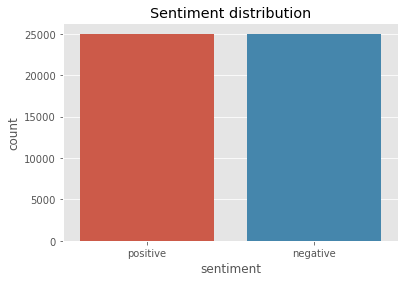

In [6]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [7]:
for i in range(8):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [8]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [9]:
df['word count'] = df['review'].apply(no_of_words)

In [10]:
df.head(10)

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230
5  Probably my all-time favorite movie, a story o...  positive         119
6  I sure would like to see a resurrection of a u...  positive         150
7  This show was an amazing, fresh & innovative i...  negative         174
8  Encouraged by the positive comments about this...  negative         130
9  If you like original gut wrenching laughter yo...  positive          33

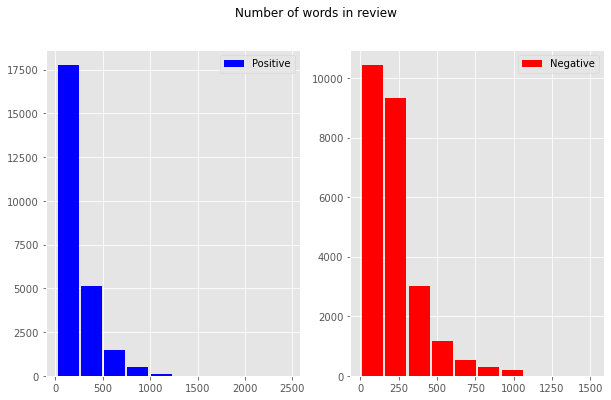

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

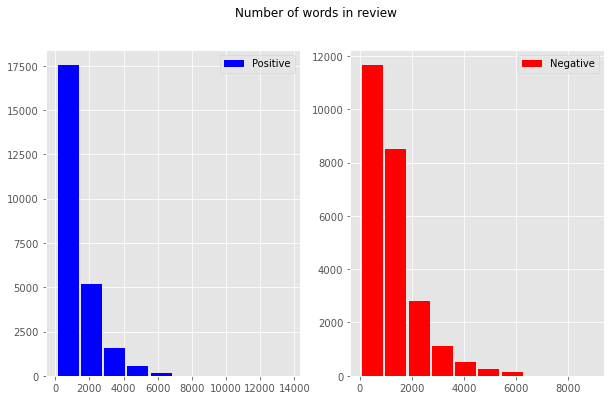

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [13]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)

In [14]:
df.head()

review  sentiment  word count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          2         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

In [15]:
import re

In [16]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [17]:
df.review = df['review'].apply(data_processing)

In [18]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  421


In [19]:
df = df.drop_duplicates('review')

In [20]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [21]:
df.review = df['review'].apply(lambda x: stemming(x))

In [22]:
df['word count'] = df['review'].apply(no_of_words)
df.head(10)

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
3  basically theres family little boy jake thinks...          2          67
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58
6  sure would like see resurrection dated seahunt...          1          76
7  show amazing fresh innovative idea 70s first a...          2          83
8  encouraged positive comments film looking forw...          2          64
9  like original gut wrenching laughter like movi...          1          17

In [23]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

review  sentiment  word count
0  one reviewers mentioned watching 1 oz episode ...          1         168
1  wonderful little production filming technique ...          1          84
2  thought wonderful way spend time hot summer we...          1          86
4  petter matteis love time money visually stunni...          1         125
5  probably alltime favorite movie story selfless...          1          58

In [24]:
from wordcloud import WordCloud


## WorldCloud for positive words

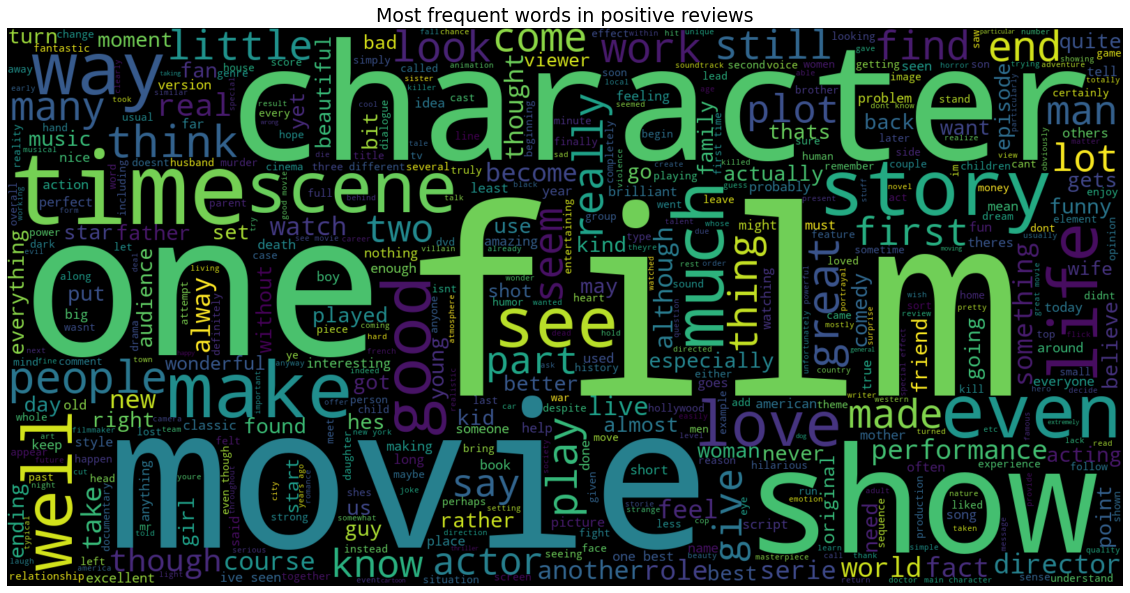

In [25]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [26]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39279),
 ('movie', 35827),
 ('one', 25621),
 ('like', 16997),
 ('good', 14281),
 ('great', 12568),
 ('story', 12335),
 ('see', 11813),
 ('time', 11723),
 ('well', 10921),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9316),
 ('much', 8970)]

In [27]:
pos_words = pd.DataFrame(count.most_common(25))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  39279
1  movie  35827
2    one  25621
3   like  16997
4   good  14281

In [28]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [29]:
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()

review  sentiment  word count
3   basically theres family little boy jake thinks...          2          67
7   show amazing fresh innovative idea 70s first a...          2          83
8   encouraged positive comments film looking forw...          2          64
10  phil alien one quirky films humour based aroun...          2          51
11  saw movie 12 came recall scariest scene big bi...          2          84

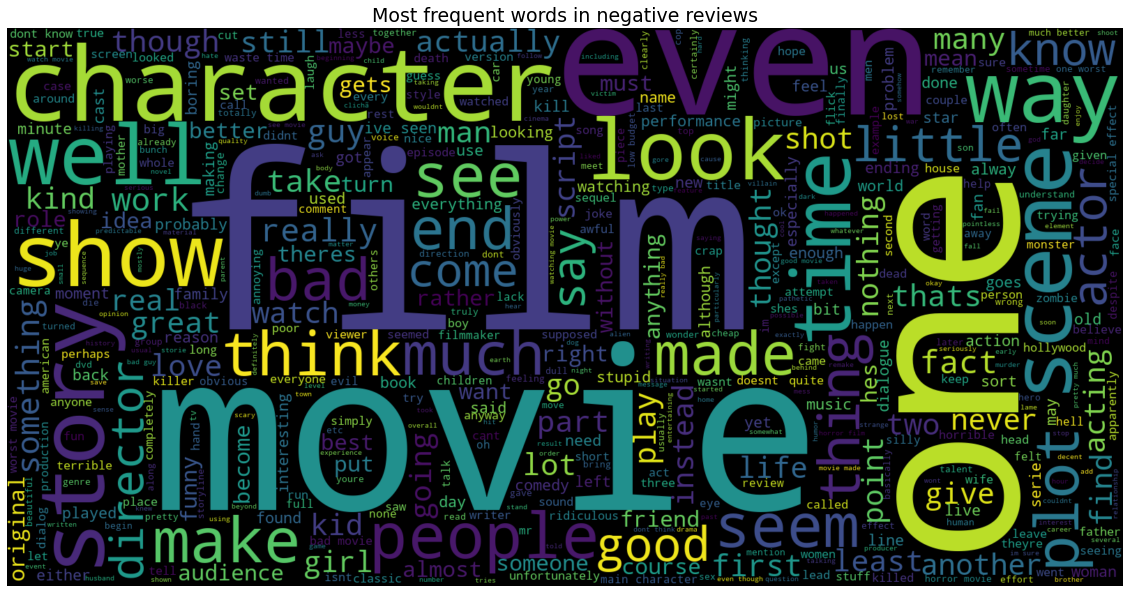

In [30]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [31]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 46991),
 ('film', 34648),
 ('one', 24356),
 ('like', 21505),
 ('even', 14757),
 ('good', 13994),
 ('bad', 13900),
 ('would', 13482),
 ('really', 12082),
 ('time', 11343),
 ('see', 10411),
 ('dont', 9888),
 ('get', 9881),
 ('much', 9757),
 ('story', 9561)]

In [32]:
neg_words = pd.DataFrame(count.most_common(25))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie  46991
1   film  34648
2    one  24356
3   like  21505
4   even  14757

In [33]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [34]:
X = df['review']
Y = df['sentiment']

In [36]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews)

NameError: name 'reviews' is not defined

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

In [ ]:
df['sentiment'] = np.where(df['sentiment']=='positive', 1, 0)
reviews = df['review'].values
sentiments = df['sentiment'].values

In [ ]:
js_model = LogisticRegression()
js_model.fit(x_train, y_train)

In [ ]:
# Save the trained model to a file
import tkinter as tk
import tkinter.messagebox as messagebox
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
joblib.dump(js_model, 'js_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

# Create the GUI
class SentimentAnalyzerGUI:
    def __init__(self, model_file):
        self.model = joblib.load(model_file)
        self.vectorizer = joblib.load('vectorizer.pkl')

        # create the GUI
        
        self.root = tk.Tk()

        # create the movie name label and text widget
        self.movie_label = tk.Label(self.root, text="Movie Name:")
        self.movie_label.pack()
        self.movie_text = tk.Entry(self.root)
        self.movie_text.pack()

        # create the review label and text widget
        self.review_label = tk.Label(self.root, text="Review:")
        self.review_label.pack()
        self.review_text = tk.Text(self.root, height=10, width=50)
        self.review_text.pack()

        # create the analyze button
        self.analyze_button = tk.Button(self.root, text="Analyze", command=self.analyze_review)
        self.analyze_button.pack()

    # define the analyze_review function
    def analyze_review(self):
        # get the movie name and review from the text widgets
        movie_name = self.movie_text.get()
        review = self.review_text.get('1.0', 'end-1c')

        # vectorize the review
        review_vect = self.vectorizer.transform([review])

        # predict the sentiment using the loaded model
        sentiment = self.model.predict(review_vect)

        # display the result in a pop-up message
        if sentiment[0] > 0.7:
           result = "Positive"
        elif sentiment[0] < 0.3:
           result = "Negative"
        else:
           result = "Neutral"

        message = f"The sentiment of the review for {movie_name} is {result}"
        messagebox.showinfo("Sentiment Analysis Result", message)

# create the SentimentAnalyzerGUI object
gui = SentimentAnalyzerGUI('js_model.pkl')
